In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [8]:
def transpose_Nazia(X):
    return  X.T

#%%
def MatrixMultiply_Nazia(a,b):
    return a.dot(b)

#%%
def Inverse_Nazia(a):
    return np.linalg.inv(a)
#%%


In [9]:

def find_prediction_Nazia(X, Y , W):
    
    y_prediction=[]
    for i in range(len(Y)):
        a=W[0]
        for j in range(1,len(W)):
            a = a+ W[j] * X.iloc[i][j]
        y_prediction.append(a)
    
    y_prediction_val = np.array(y_prediction)
    return y_prediction_val


In [10]:
def findMSE_Nazia(y_prediction_val , Y):
    y_test =np.array(Y)

    y_cap=[]
    for i,j in zip(y_prediction_val , y_test):
        y_cap.append((i-j)**2)
    
    y_cap=np.array(y_cap)
    msc = sum(y_cap)/float(len(y_cap))
    return msc
    

In [11]:
def findRMSC_Nazia(msc):
    return math.sqrt(msc)


In [12]:
def findMAE_Nazia(y_prediction_val,Y):
    
    y_cap_2=[]
    y_test=np.array(Y)
    for i , j in zip(y_prediction_val,y_test):
        y_cap_2.append(abs(i-j))

    mae= sum(y_cap_2)/ float(len(y_cap_2))
    return mae


In [13]:
def findRsquare_Nazia(y_prediction_val,Y):
#R square 
    numerator=[]
    y_test=np.array(Y)
    y_test_mean =sum(y_test)/float(len(y_test))
    for i , j in zip(y_test ,y_prediction_val):
        numerator.append(((i - j)**2))
    
    numerator=np.array(numerator)
    denominator=[((i - y_test_mean)**2) for i in y_test]
    denominator=np.array(denominator)

    r_square =(1-(sum(numerator)/sum(denominator))) 

    return r_square


In [14]:
def plot_graph_Nazia(X,y_prediction_val,Y):

    plt.figure (figsize=(20,10), dpi = 80)
   
    plt.subplot(2,2,1)
    
    plt.grid(color='grey')
    plt.scatter(X['house age'], Y, color='#5094d9', marker='+', label='Test values')
    plt.scatter(X['house age'],y_prediction_val, color='navy',marker='_', label = 'predicted values')
    plt.xlabel('house age', size=12)
    plt.ylabel("price", size =12)
    plt.legend(fontsize=15,loc="upper left")
    
    plt.subplot(2,2,2)
    
    plt.grid(color='grey')
    plt.scatter(X['distance to the nearest MRT station'], Y, color='#5094d9', marker='+', label='Test values')
    plt.scatter(X['distance to the nearest MRT station'],y_prediction_val,marker='_', color='firebrick', label = 'predicted values')
    plt.xlabel('distance to the nearest MRT station', size=12)
    plt.ylabel("price", size =12)
    plt.legend(fontsize=15,loc="upper left")

    plt.subplot(2,2,3)
    
    plt.grid(color='grey')
    plt.scatter(X['number of convenience stores'], Y, color='#5094d9', marker='+', label='Test values')
    plt.scatter(X['number of convenience stores'],y_prediction_val, marker='_',color='forestgreen', label = 'predicted values')
    plt.xlabel('number of convenience stores', size=12)
    plt.ylabel("price", size =12)
    plt.legend(fontsize=15,loc="upper left")
    

    plt.subplot(2,2,4)
    
    plt.grid(color='grey')
    plt.scatter(X['longitude'], Y, color='#5094d9', marker='+', label='Test values')
    plt.scatter(X['longitude'],y_prediction_val, color='indigo', marker='_',label = 'predicted values')
    plt.xlabel('longitude', size=12)
    plt.ylabel("price", size =12)
    plt.legend(fontsize=15,loc="upper left")
    
    plt.show()

In [15]:
def plot_graph_3d_Nazia(X,Y):
    from mpl_toolkits.mplot3d import Axes3D

    
    fig = plt.figure(figsize = (20, 10))
   
    ax = plt.axes(projection ="3d")
    x1=X['house age']
    x2=X['latitude']
    x3=Y
    plt3d=ax.scatter3D(x1, x2, x3, c=x3,  marker='*')
    ax.set_xlabel('$House Age$', fontsize=12)
    ax.set_ylabel('$Latitude$', fontsize=12)
    ax.set_zlabel('$House price unit$', fontsize=12)
    ax.set_title("3D plot ")
    
    plt.show()


In [16]:
def plot_utility_Nazia(X,Y):
    plt.figure (figsize=(40,20))
    plt.subplot(2,2,1)
    plt.title("Scatter co relation",fontsize=25)
    
    plt.scatter(X['house age'], Y,color='firebrick', marker='*')
    plt.grid(color='grey')
    plt.xlabel("House Age",size=18)
    plt.ylabel("House price per unit" , size=18)
    
    
    plt.subplot(2,2,2)
    plt.title("Scatter co relation",fontsize=25)
   
    plt.scatter(X['distance to the nearest MRT station'], Y,color='firebrick', marker='*')
    plt.grid(color='grey')
   
    plt.xlabel("distance to the nearest MRT station",size=18)
    plt.ylabel("House price per unit" , size=18)
    
    
    plt.subplot(2,2,3)
    plt.title("Scatter co relation",fontsize=25)
   
    plt.scatter(X['number of convenience stores'], Y,color='firebrick', marker='*' )
    plt.grid(color='grey')
   
    plt.xlabel("number of convenience stores",size=18)
    plt.ylabel("House price per unit" , size=18)
    
    
    plt.subplot(2,2,4)
    plt.title("Scatter co relation", fontsize=25)
    plt.scatter(X['latitude'], Y,color='firebrick', marker='*')
    plt.grid(color='grey')
    plt.xlabel("latitude",size=18)
    plt.ylabel("House price per unit" , size=18)
    plt.show()
    
    

Model evaluation : 
MSC :  [79.20185189]
RMSC :  8.89954222935707
MAE :  [6.1748687]
R square :  [0.57116171]


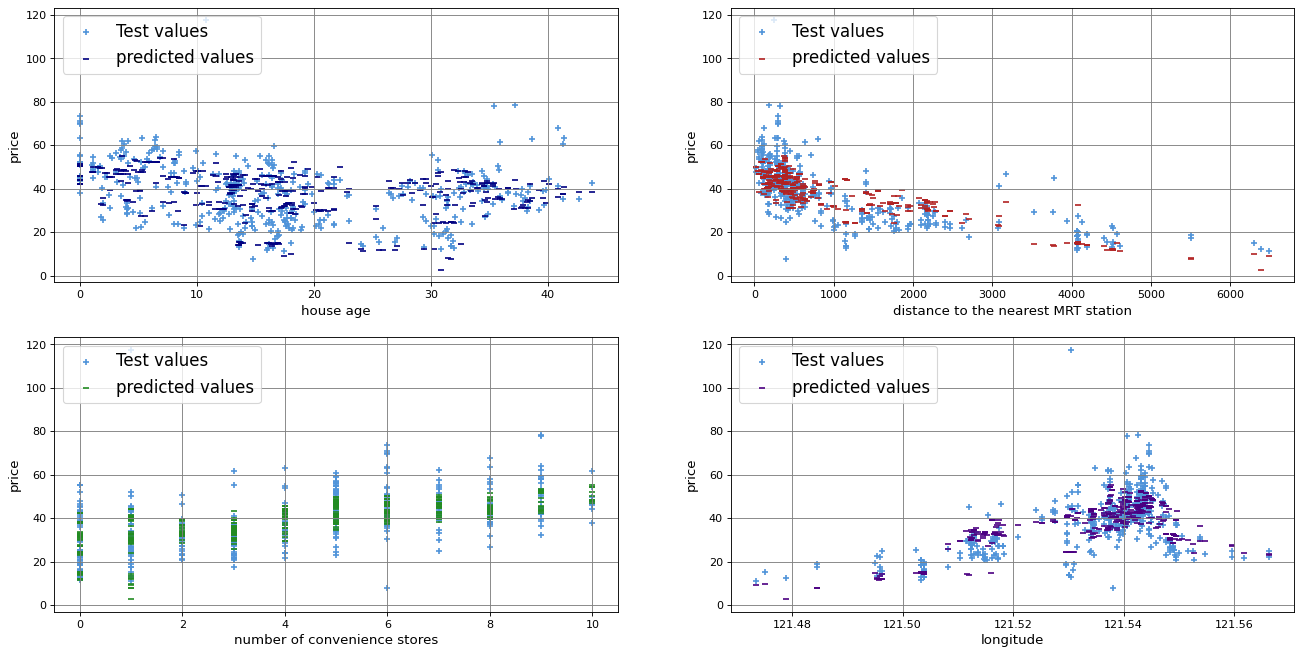

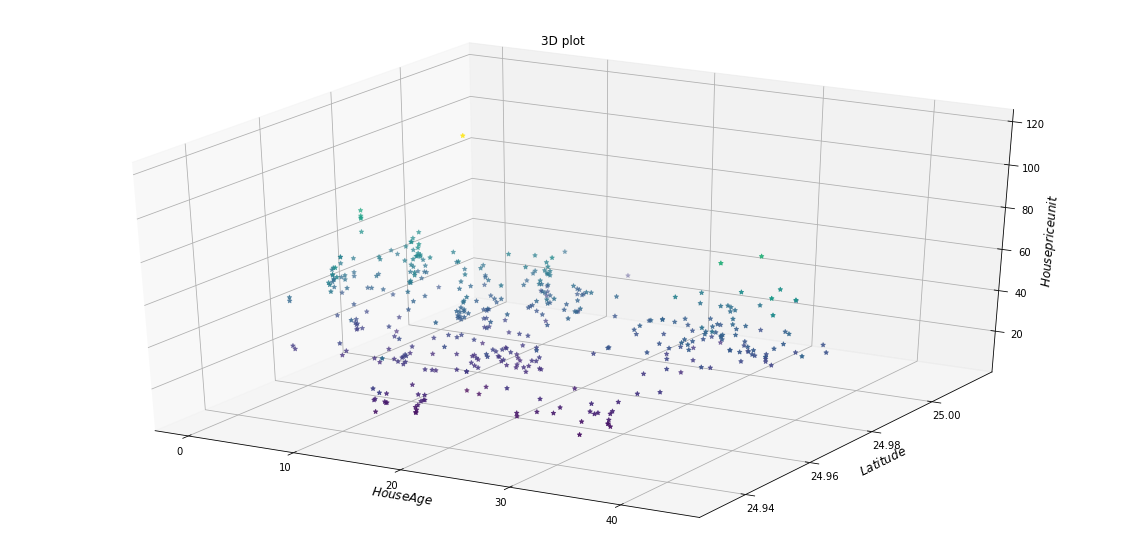

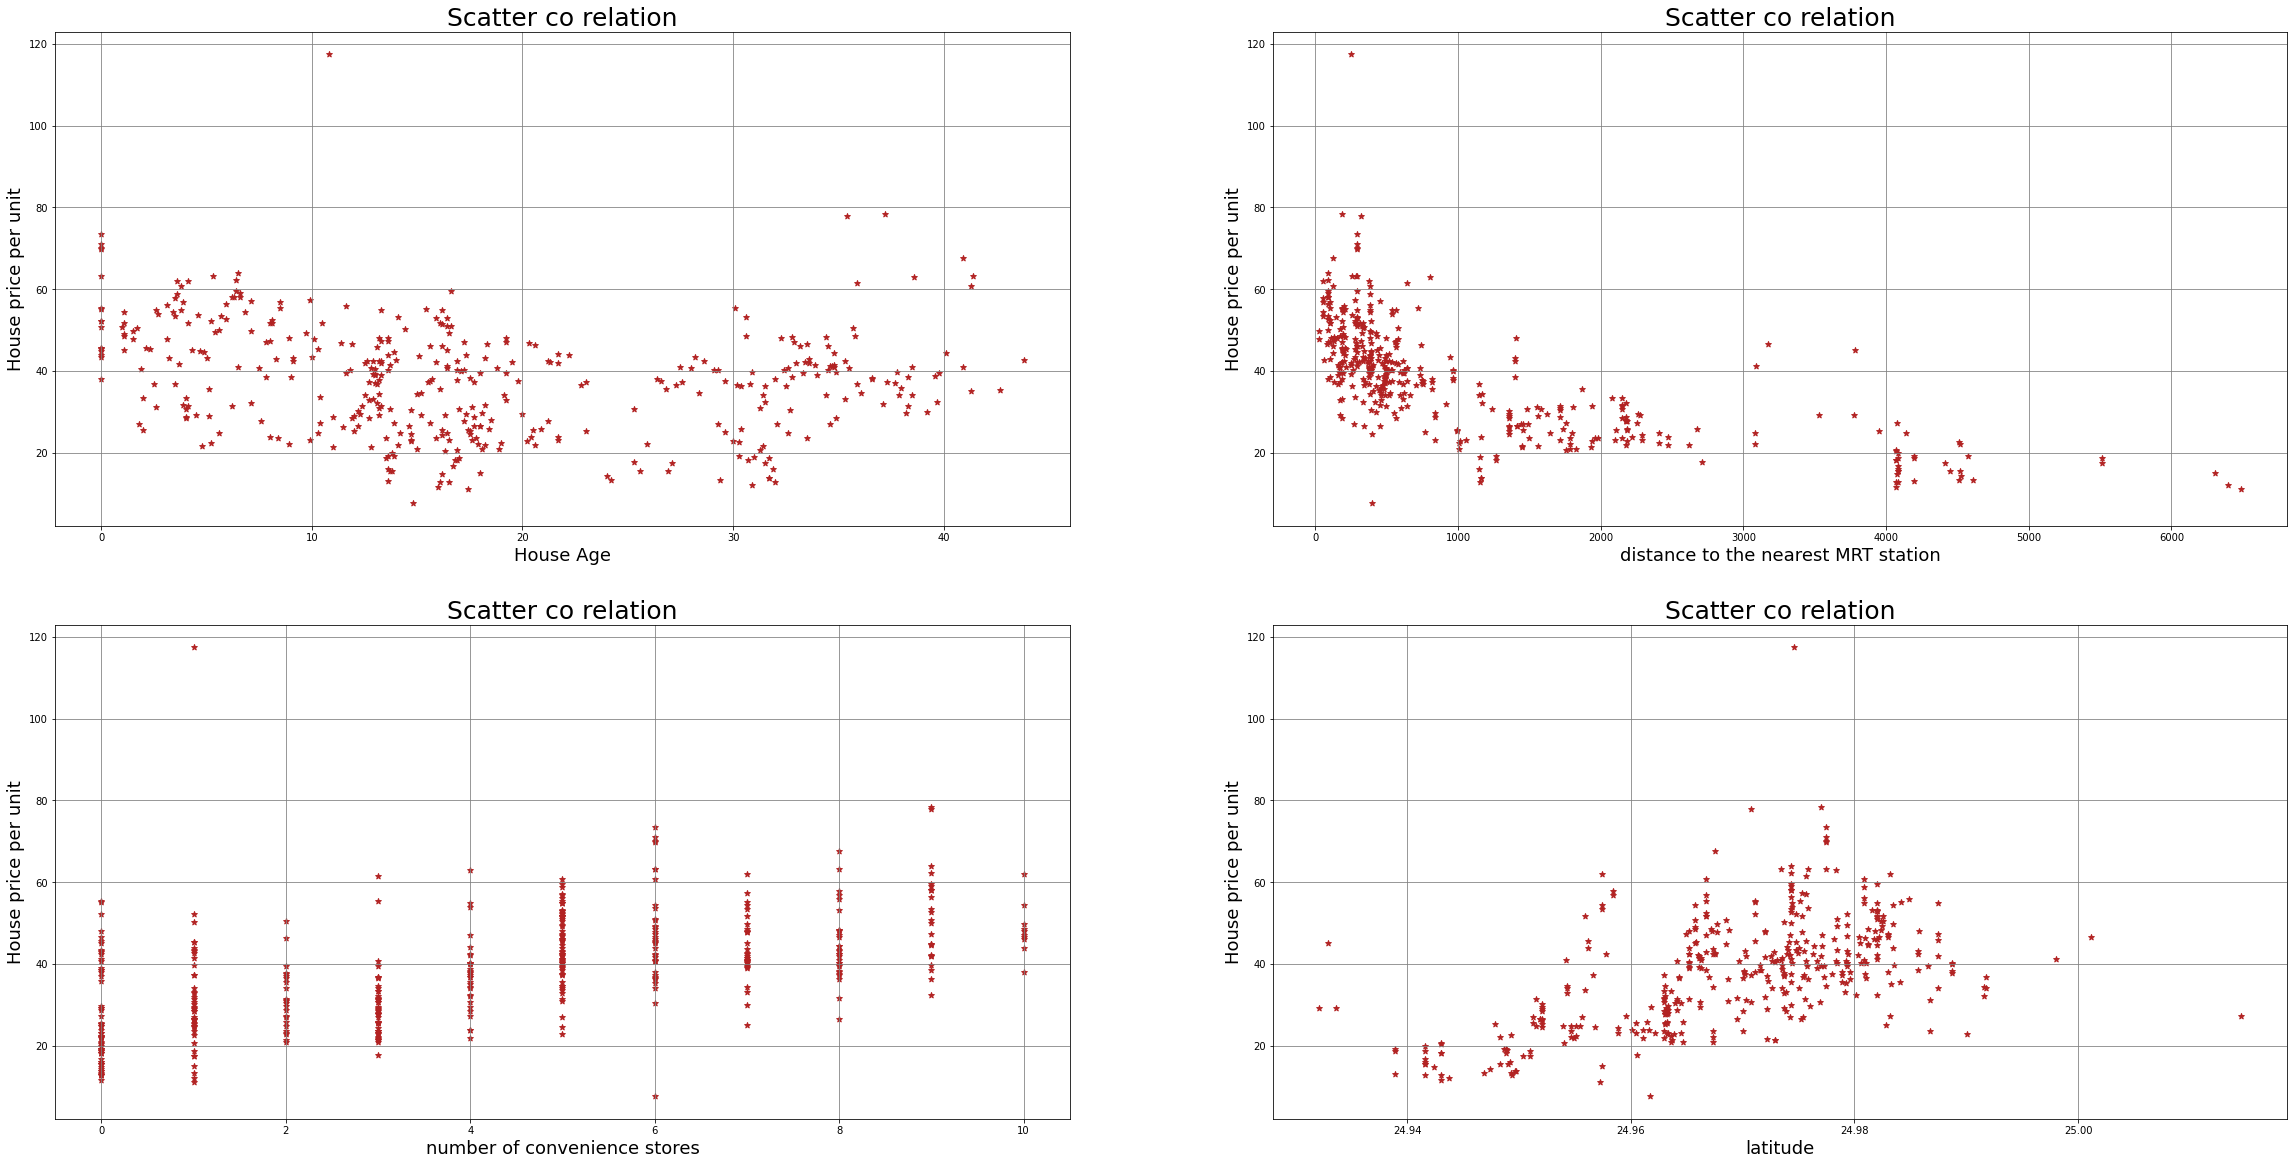

In [18]:
df=pd.read_csv('Real estate.csv')
df.drop(['transaction date'], axis=1)
    
bias_list=[1 for i in range(len(df.index))]
df['bias_value'] = bias_list
    
df_X=df[['bias_value', 'house age','distance to the nearest MRT station',
             'number of convenience stores' , 'latitude' , 'longitude']]
    
df_Y = df[['house price of unit area']]
X=df_X.iloc[:2000]
Y=df_Y.iloc[:2000]
   


#Calculating prediction
trans_x = transpose_Nazia(X)
xT_dot_x = MatrixMultiply_Nazia(trans_x,X)
inverse = Inverse_Nazia(xT_dot_x)
xT_dot_y = MatrixMultiply_Nazia(trans_x,Y)
W = MatrixMultiply_Nazia(inverse,xT_dot_y)

    #prediction values
y_prediction_val=find_prediction_Nazia(X,Y,W)

    #Model Evaluation
msc = findMSE_Nazia(y_prediction_val, Y)
rmsc = findRMSC_Nazia(msc)
mae=findMAE_Nazia(y_prediction_val,Y)
R_sqr = findRsquare_Nazia(y_prediction_val, Y)

print("Model evaluation : ")
print("MSC : ", msc)
print("RMSC : ", rmsc)
print("MAE : ", mae)
print("R square : ", R_sqr)
    

plot_graph_Nazia(X,y_prediction_val,Y)
plot_graph_3d_Nazia(X,Y)
plot_utility_Nazia(X,Y)

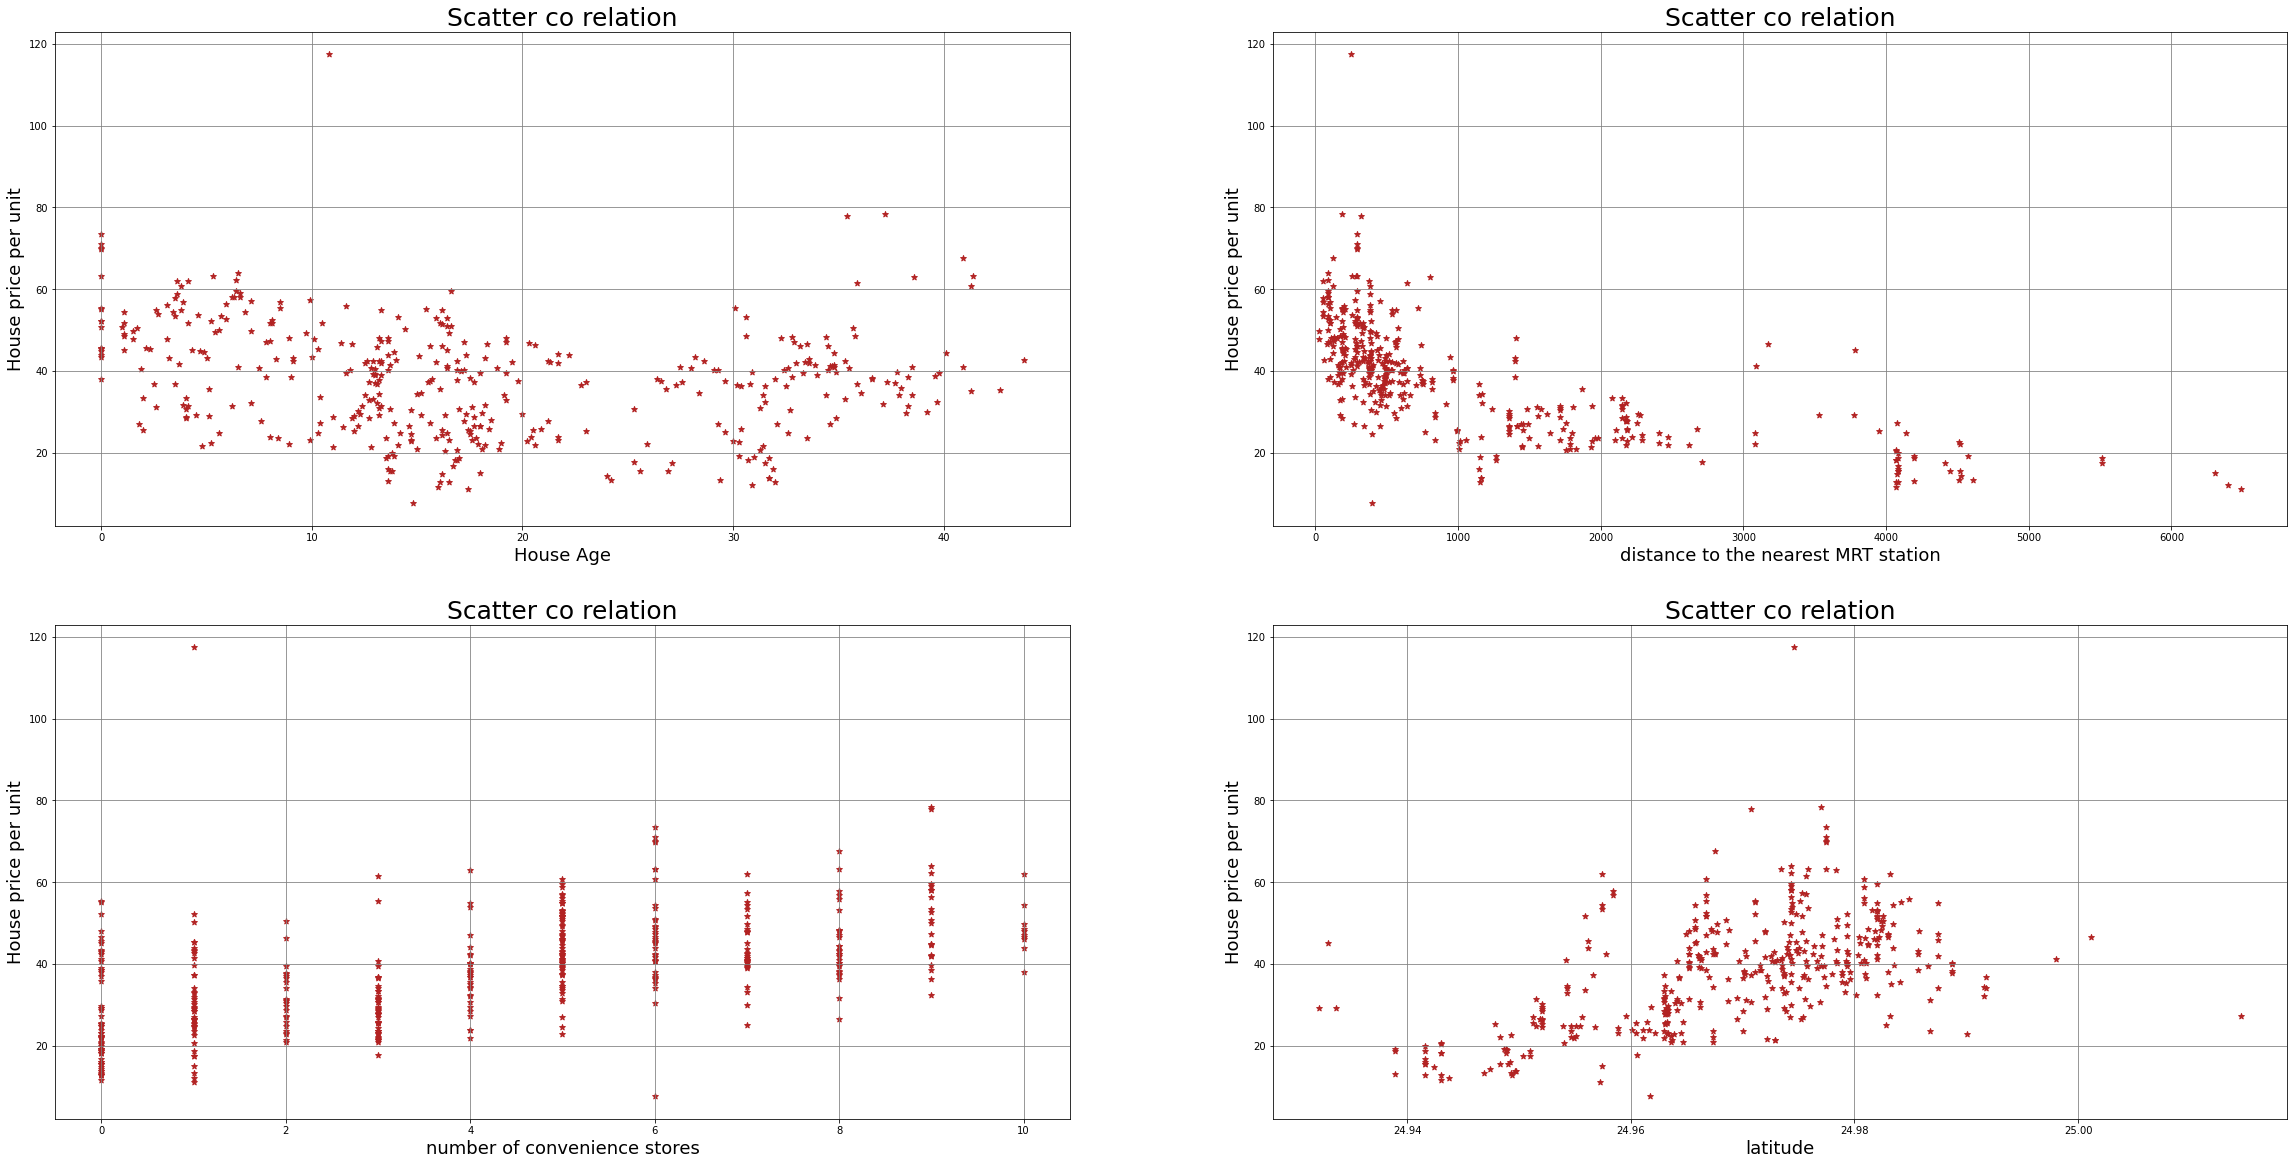

In [19]:
plot_utility_Nazia(X,Y)